In [66]:
import pandas as pd
import numpy as np
from datetime import datetime
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# loading the dataset
data = pd.read_csv("BostonBluebikesTrip.csv")
print(data.head())

            ride_id  rideable_type  trip_date  day_of_the_week   start_time  \
0  B44016B0D4045BD7   classic_bike   10/3/2024        Thursday   9:57:52 AM   
1  F5B65476597CBCE9  electric_bike   10/4/2024          Friday  12:38:17 AM   
2  083CD23EEC6993AA  electric_bike   10/3/2024        Thursday   6:06:57 PM   
3  0FE39332F4F098D5   classic_bike  10/19/2024        Saturday   4:48:19 PM   
4  25913FAF6F3F66F7   classic_bike   10/1/2024         Tuesday   6:11:05 AM   

      end_time trip_duration                start_station_name start_district  \
0  10:16:26 AM   12:18:34 AM                  Lansdowne T Stop         Boston   
1  12:45:08 AM   12:06:51 AM                  Lansdowne T Stop         Boston   
2   6:30:12 PM   12:23:15 AM  South Station - 700 Atlantic Ave         Boston   
3   4:54:53 PM   12:06:34 AM  South Station - 700 Atlantic Ave         Boston   
4   6:35:12 AM   12:24:07 AM              Main St at Austin St         Boston   

  start_station_id                    

In [68]:
print(data.columns)


Index(['ride_id', 'rideable_type', 'trip_date ', 'day_of_the_week',
       'start_time', 'end_time', 'trip_duration', 'start_station_name',
       'start_district', 'start_station_id', 'end_station_name',
       'end_district ', 'end_station_id', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'member_casual'],
      dtype='object')


Converting the start time and the end time to datetime format

In [69]:
# Converting datatypes to ensure compatibility
#data['trip_date'] = pd.to_datetime(data['trip_date'])
data['start_time'] = pd.to_datetime(data['start_time'], format='%I:%M:%S %p')
data['end_time'] = pd.to_datetime(data['end_time'], format='%I:%M:%S %p')


# Calculate trip distance using geopy
data['distance_km'] = data.apply(
    lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).kilometers, axis=1
)

In [70]:
print(data.distance_km)

0         1.973065
1         1.596102
2         4.057776
3         0.000000
4         6.498829
            ...   
563192    4.824621
563193    1.418307
563194    1.221880
563195    2.593182
563196    2.545653
Name: distance_km, Length: 563197, dtype: float64


In [71]:
print(data.head())

            ride_id  rideable_type  trip_date  day_of_the_week  \
0  B44016B0D4045BD7   classic_bike   10/3/2024        Thursday   
1  F5B65476597CBCE9  electric_bike   10/4/2024          Friday   
2  083CD23EEC6993AA  electric_bike   10/3/2024        Thursday   
3  0FE39332F4F098D5   classic_bike  10/19/2024        Saturday   
4  25913FAF6F3F66F7   classic_bike   10/1/2024         Tuesday   

           start_time            end_time trip_duration  \
0 1900-01-01 09:57:52 1900-01-01 10:16:26   12:18:34 AM   
1 1900-01-01 00:38:17 1900-01-01 00:45:08   12:06:51 AM   
2 1900-01-01 18:06:57 1900-01-01 18:30:12   12:23:15 AM   
3 1900-01-01 16:48:19 1900-01-01 16:54:53   12:06:34 AM   
4 1900-01-01 06:11:05 1900-01-01 06:35:12   12:24:07 AM   

                 start_station_name start_district start_station_id  \
0                  Lansdowne T Stop         Boston           B32058   
1                  Lansdowne T Stop         Boston           B32058   
2  South Station - 700 Atlantic Ave

Trip Duration

In [72]:
import pandas as pd

# convert `trip_duration` to a timedelta
data['trip_duration'] = pd.to_timedelta(data['trip_duration'], errors='coerce')

# Convert the timedelta to total seconds for easier analysis
data['trip_duration'] = data['trip_duration'].dt.total_seconds()

# Now, calculate the average trip duration for members and casual users
avg_duration = data.groupby('member_casual')['trip_duration'].mean()
print("Average Trip Duration (seconds):\n", avg_duration)

Average Trip Duration (seconds):
 member_casual
casual    44241.434121
member    43913.377509
Name: trip_duration, dtype: float64


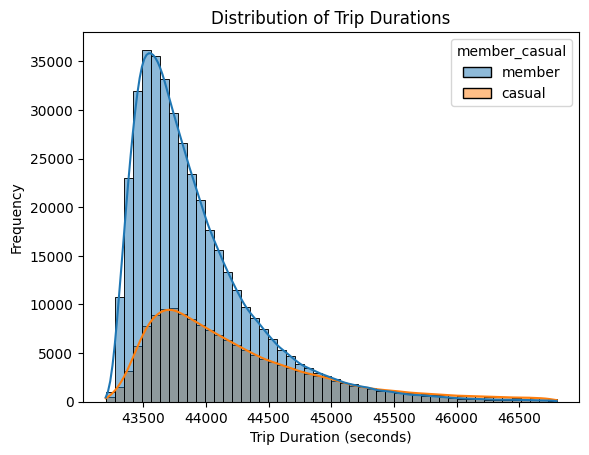

In [73]:
sns.histplot(data, x='trip_duration', hue='member_casual', bins=50, kde=True)
plt.title("Distribution of Trip Durations")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

Bike Usage Preferences by Members and Non Members

In [74]:
# Count of bike types used by members and casual users
bike_type_pref = data.groupby(['member_casual', 'rideable_type']).size().unstack()
print("Bike Type Preferences:\n", bike_type_pref)

Bike Type Preferences:
 rideable_type  classic_bike  electric_bike
member_casual                             
casual               123425          35375
member               301602         102795


Peak Usage Time by Members and Non Members

In [75]:
# Extract hour from start_time
data['hour'] = data['start_time'].dt.hour

# Group by hour and member_casual to get ride counts
peak_usage = data.groupby(['hour', 'member_casual']).size().reset_index(name='ride_count')

# Display the peak usage data
print(peak_usage)

    hour member_casual  ride_count
0      0        casual        2645
1      0        member        3604
2      1        casual        2550
3      1        member        2326
4      2        casual        1311
5      2        member        1302
6      3        casual         401
7      3        member         569
8      4        casual         280
9      4        member         687
10     5        casual         685
11     5        member        2499
12     6        casual        1577
13     6        member        7339
14     7        casual        3882
15     7        member       19263
16     8        casual        6710
17     8        member       33328
18     9        casual        5960
19     9        member       23033
20    10        casual        6546
21    10        member       17110
22    11        casual        8181
23    11        member       18439
24    12        casual        9803
25    12        member       20735
26    13        casual       10676
27    13        memb

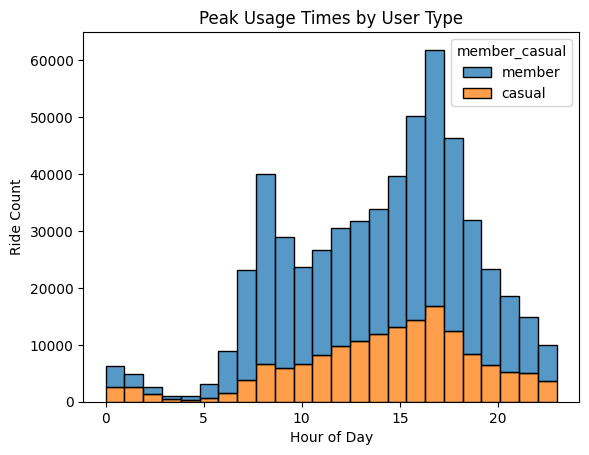

In [76]:
# Extract hour from start_time
data['hour'] = data['start_time'].dt.hour

# Plot peak hours
sns.histplot(data=data, x='hour', hue='member_casual', multiple='stack', bins=24)
plt.title("Peak Usage Times by User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.show()

Top preferred start and end stations

In [77]:
# Combine start and end stations into a single column to count all stations
all_stations = pd.concat([data['start_station_name'], data['end_station_name']])

# Count the frequency of each station
station_counts = all_stations.value_counts()

# Top 10 busiest stations
top_10_busy_stations = station_counts.head(10)
print("Top 10 Busiest Stations:")
print(top_10_busy_stations)

# Bottom 10 least busy stations
bottom_10_least_busy_stations = station_counts.tail(10)
print("\nBottom 10 Least Busy Stations:")
print(bottom_10_least_busy_stations)


Top 10 Busiest Stations:
MIT at Mass Ave / Amherst St                                   22322
Central Square at Mass Ave / Essex St                          15295
MIT Vassar St                                                  14534
Harvard Square at Mass Ave/ Dunster                            14412
Ames St at Main St                                             13546
Beacon St at Massachusetts Ave                                 11883
MIT Pacific St at Purrington St                                10973
Christian Science Plaza - Massachusetts Ave at Westland Ave    10527
Commonwealth Ave at Agganis Way                                10174
Boylston St at Massachusetts Ave                                9784
Name: count, dtype: int64

Bottom 10 Least Busy Stations:
Community Life Center                      49
Revere Public Library                      45
Cedar Grove T Stop                         44
Cummins Highway at Blue Hill Ave T Stop    43
Newton Library                             

In [78]:
# Combine start and end stations into a single column for both start and end stations
all_stations = pd.concat([data[['start_station_name', 'member_casual']], data[['end_station_name', 'member_casual']]])

# Rename the columns to make them consistent
all_stations = all_stations.rename(columns={'start_station_name': 'station_name'})

# Count the frequency of each station for members and non-members
station_counts_by_member = all_stations.groupby(['station_name', 'member_casual']).size().unstack(fill_value=0)

# Top 10 busiest stations
top_10_busy_stations = station_counts_by_member.sum(axis=1).nlargest(10)
print("Top 10 Busiest Stations:")
print(top_10_busy_stations)

# Bottom 10 least busy stations
bottom_10_least_busy_stations = station_counts_by_member.sum(axis=1).nsmallest(10)
print("\nBottom 10 Least Busy Stations:")
print(bottom_10_least_busy_stations)

# For better understanding, show the distribution of members and non-members for the busiest and least busy stations
print("\nTop 10 Busiest Stations with Member and Casual Counts:")
print(station_counts_by_member.loc[top_10_busy_stations.index])

print("\nBottom 10 Least Busy Stations with Member and Casual Counts:")
print(station_counts_by_member.loc[bottom_10_least_busy_stations.index])


Top 10 Busiest Stations:
station_name
MIT at Mass Ave / Amherst St                                   11296
Central Square at Mass Ave / Essex St                           7618
MIT Vassar St                                                   7548
Harvard Square at Mass Ave/ Dunster                             7107
Ames St at Main St                                              6294
Beacon St at Massachusetts Ave                                  5989
MIT Pacific St at Purrington St                                 5601
Christian Science Plaza - Massachusetts Ave at Westland Ave     5258
Commonwealth Ave at Agganis Way                                 5058
Boylston St at Massachusetts Ave                                4862
dtype: int64

Bottom 10 Least Busy Stations:
station_name
Medford St. at Warren St.                   1
Shawmut Ave. at Herald St.                  1
855 Broadway                                2
2 Hummingbird Lane at Olmsted Green         8
Hyde Park Ave at Arlington St 

Average Trip Distance Analysis

In [79]:
# Average trip distance for members and casual users
avg_distance = data.groupby('member_casual')['distance_km'].mean()
print("Average Trip Distance (km):\n", avg_distance)

Average Trip Distance (km):
 member_casual
casual    2.126892
member    1.970809
Name: distance_km, dtype: float64


Ride Counts from Each Station Districts

In [80]:
# Strip whitespace from column names if they exist
data.columns = data.columns.str.strip()

# Check again if 'start_district' is accessible
print('start_district' in data.columns)

True


In [81]:
# Count rides by start and end district for each user type
start_district_count = data.groupby(['member_casual', 'start_district']).size()
end_district_count = data.groupby(['member_casual', 'end_district']).size()
print("Start District Count:\n", start_district_count)
print("End District Count:\n", end_district_count)

Start District Count:
 member_casual  start_district
casual         0                    509
               Arlington            359
               Boston             81286
               Brookline           4119
               Cambridge          39090
               Chelsea              241
               Everett             1073
               Malden               309
               Medford              494
               Newton               779
               Revere               151
               Salem               2052
               Somerville          7486
               Watertown            756
member         0                   1150
               Arlington            530
               Boston            182485
               Brookline          10727
               Cambridge         141533
               Chelsea              408
               Everett             1678
               Malden               509
               Medford              840
               Newton      

Weekly ride patterns

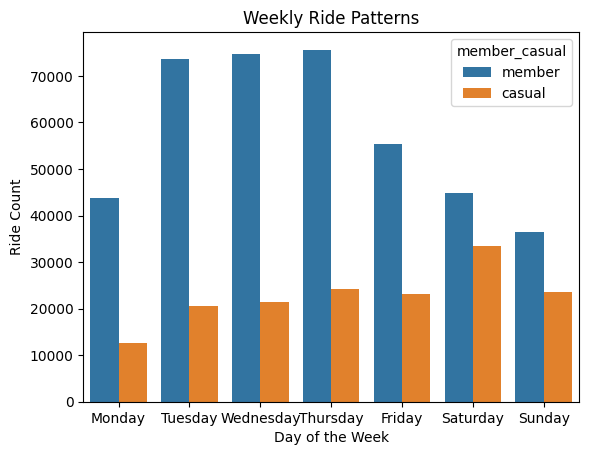

In [82]:
# Convert 'trip_date' to datetime
data['trip_date'] = pd.to_datetime(data['trip_date'], errors='coerce')

# Extract day of the week from trip_date
data['day'] = data['trip_date'].dt.day_name()

# Plot trips by day of the week
sns.countplot(data=data, x='day', hue='member_casual', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Ride Patterns")
plt.xlabel("Day of the Week")
plt.ylabel("Ride Count")
plt.show()

Identifying round trips

In [83]:
# Identify round trips
data['round_trip'] = data['start_station_id'] == data['end_station_id']
round_trip_count = data.groupby(['member_casual', 'round_trip']).size().unstack()
print("Round Trip Count:\n", round_trip_count)

Round Trip Count:
 round_trip      False  True 
member_casual               
casual         150059   8741
member         397697   6700


In [84]:
print(data.head)

<bound method NDFrame.head of                  ride_id  rideable_type  trip_date day_of_the_week  \
0       B44016B0D4045BD7   classic_bike 2024-10-03        Thursday   
1       F5B65476597CBCE9  electric_bike 2024-10-04          Friday   
2       083CD23EEC6993AA  electric_bike 2024-10-03        Thursday   
3       0FE39332F4F098D5   classic_bike 2024-10-19        Saturday   
4       25913FAF6F3F66F7   classic_bike 2024-10-01         Tuesday   
...                  ...            ...        ...             ...   
563192  BCF5A34D5DBE606C   classic_bike 2024-10-11          Friday   
563193  CFCEFEBD8BAB7635   classic_bike 2024-10-29         Tuesday   
563194  A34B431F64064B9D   classic_bike 2024-10-04          Friday   
563195  09DA401480CA03D5  electric_bike 2024-10-31        Thursday   
563196  864EC56FD5ECCA77   classic_bike 2024-10-07          Monday   

                start_time            end_time  trip_duration  \
0      1900-01-01 09:57:52 1900-01-01 10:16:26        44314.0   

Feature Engineering

               trip_duration  start_lat  start_lng   end_lat   end_lng  \
trip_duration       1.000000   0.025495   0.005552  0.018747 -0.004449   
start_lat           0.025495   1.000000   0.108330  0.761263  0.125227   
start_lng           0.005552   0.108330   1.000000  0.130958  0.722847   
end_lat             0.018747   0.761263   0.130958  1.000000  0.102959   
end_lng            -0.004449   0.125227   0.722847  0.102959  1.000000   
member_casual      -0.257881  -0.032356  -0.059066 -0.028611 -0.055350   
distance_km         0.587949  -0.051187  -0.095823 -0.051399 -0.091339   
hour                0.021599   0.014442  -0.001348  0.017043 -0.053942   
day_of_week              NaN        NaN        NaN       NaN       NaN   

               member_casual  distance_km      hour  day_of_week  
trip_duration      -0.257881     0.587949  0.021599          NaN  
start_lat          -0.032356    -0.051187  0.014442          NaN  
start_lng          -0.059066    -0.095823 -0.001348       

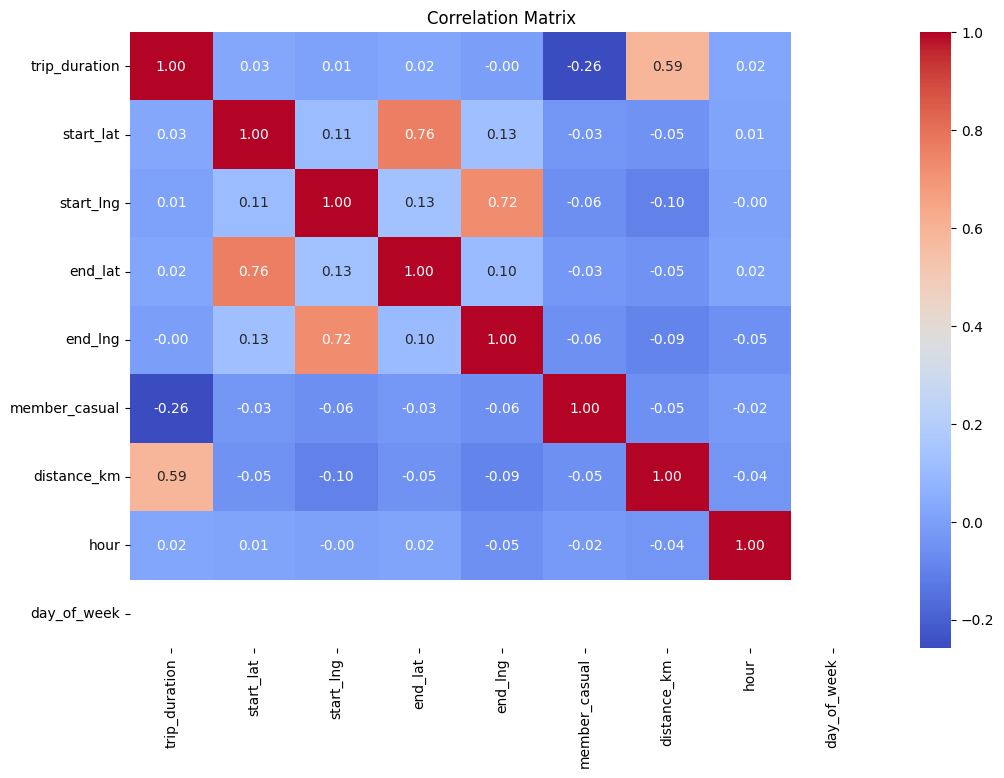

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlation matrix on numeric columns only
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
c

Using Random Forest Regressor to predict the Member and Casual Riders

Casual Riders RMSE: 321.86159647276924
Member Riders RMSE: 872.823345837758


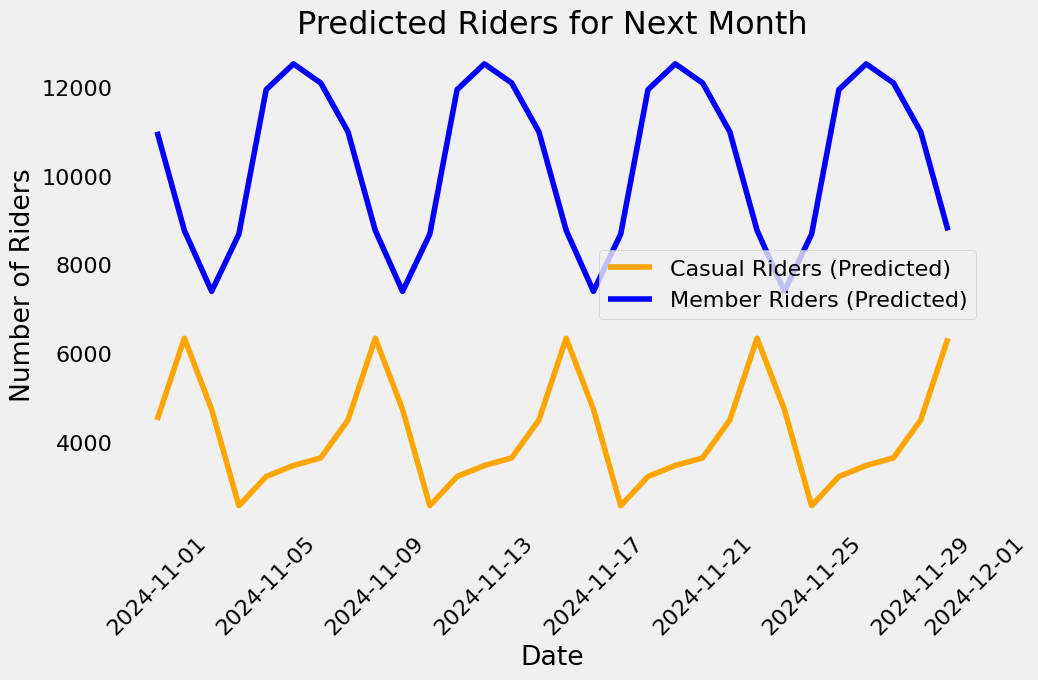

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Aggregate the data
data['trip_date'] = pd.to_datetime(data['trip_date'])
daily_data = data.groupby(['trip_date', 'member_casual']).size().unstack(fill_value=0)
daily_data.columns = ['casual', 'member']
daily_data.reset_index(inplace=True)

#Feature Engineering
daily_data['day_of_week'] = daily_data['trip_date'].dt.weekday  # Monday = 0
daily_data['month'] = daily_data['trip_date'].dt.month
daily_data['year'] = daily_data['trip_date'].dt.year

# Cyclical features for day_of_week and month
daily_data['day_sin'] = np.sin(2 * np.pi * daily_data['day_of_week'] / 7)
daily_data['day_cos'] = np.cos(2 * np.pi * daily_data['day_of_week'] / 7)
daily_data['month_sin'] = np.sin(2 * np.pi * daily_data['month'] / 12)
daily_data['month_cos'] = np.cos(2 * np.pi * daily_data['month'] / 12)

#Prepare Training and Test Data
X = daily_data[['day_of_week', 'month', 'year', 'day_sin', 'day_cos', 'month_sin', 'month_cos']]
y_casual = daily_data['casual']
y_member = daily_data['member']

X_train, X_test, y_casual_train, y_casual_test = train_test_split(X, y_casual, test_size=0.2, random_state=42)
_, _, y_member_train, y_member_test = train_test_split(X, y_member, test_size=0.2, random_state=42)

#Train Models
casual_model = RandomForestRegressor(random_state=42)
member_model = RandomForestRegressor(random_state=42)

casual_model.fit(X_train, y_casual_train)
member_model.fit(X_train, y_member_train)

# Evaluate Models
y_casual_pred = casual_model.predict(X_test)
y_member_pred = member_model.predict(X_test)

print("Casual Riders RMSE:", np.sqrt(mean_squared_error(y_casual_test, y_casual_pred)))
print("Member Riders RMSE:", np.sqrt(mean_squared_error(y_member_test, y_member_pred)))

# Predict for the Next Month
future_dates = pd.date_range(start=daily_data['trip_date'].max() + pd.Timedelta(days=1),
                             periods=30, freq='D')
future_df = pd.DataFrame({'trip_date': future_dates})
future_df['day_of_week'] = future_df['trip_date'].dt.weekday
future_df['month'] = future_df['trip_date'].dt.month
future_df['year'] = future_df['trip_date'].dt.year
future_df['day_sin'] = np.sin(2 * np.pi * future_df['day_of_week'] / 7)
future_df['day_cos'] = np.cos(2 * np.pi * future_df['day_of_week'] / 7)
future_df['month_sin'] = np.sin(2 * np.pi * future_df['month'] / 12)
future_df['month_cos'] = np.cos(2 * np.pi * future_df['month'] / 12)

X_future = future_df[['day_of_week', 'month', 'year', 'day_sin', 'day_cos', 'month_sin', 'month_cos']]
future_df['casual_pred'] = casual_model.predict(X_future)
future_df['member_pred'] = member_model.predict(X_future)

# Plot Predictions
plt.figure(figsize=(10, 6))
plt.plot(future_df['trip_date'], future_df['casual_pred'], label='Casual Riders (Predicted)', color='orange')
plt.plot(future_df['trip_date'], future_df['member_pred'], label='Member Riders (Predicted)', color='blue')
plt.legend()
plt.title("Predicted Riders for Next Month")
plt.xlabel("Date")
plt.ylabel("Number of Riders")
plt.xticks(rotation=45)
plt.grid()
plt.show()


Lower RMSE value for Casual Riders seems good. But the model didnt work that great for the Member Riders. Lets try another advanced model

In [105]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string and encode
    label_encoders[col] = le  # Store the encoder for future use if needed

# Check the data types again to ensure everything is numeric
print(X.dtypes)

# Proceed with splitting data
X_train, X_test, y_train_casual, y_test_casual = train_test_split(X, y_casual, test_size=0.2, random_state=42)
X_train_member, X_test_member, y_train_member, y_test_member = train_test_split(X, y_member, test_size=0.2, random_state=42)

# Define XGBoost parameters
xgb_params = {
    "objective": "reg:squarederror",  # Regression problem
    "learning_rate": 0.1,
    "max_depth": 6,
    "n_estimators": 100,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
}

# Train the XGBoost model for casual riders
xgb_casual = xgb.XGBRegressor(**xgb_params)
xgb_casual.fit(X_train, y_train_casual)

# Predict on the test set for casual riders
y_pred_casual = xgb_casual.predict(X_test)
rmse_casual = np.sqrt(mean_squared_error(y_test_casual, y_pred_casual))
print(f"Casual Riders RMSE: {rmse_casual}")

# Train the XGBoost model for member riders
xgb_member = xgb.XGBRegressor(**xgb_params)
xgb_member.fit(X_train_member, y_train_member)

# Predict on the test set for member riders
y_pred_member = xgb_member.predict(X_test_member)
rmse_member = np.sqrt(mean_squared_error(y_test_member, y_pred_member))
print(f"Member Riders RMSE: {rmse_member}")


day_of_week      int32
month            int32
year             int32
day_sin        float64
day_cos        float64
month_sin      float64
month_cos      float64
dtype: object
Casual Riders RMSE: 320.9636611201594
Member Riders RMSE: 942.4740737114396


Casual Riders RMSE: 0.003358442508453425


<Figure size 1000x600 with 0 Axes>

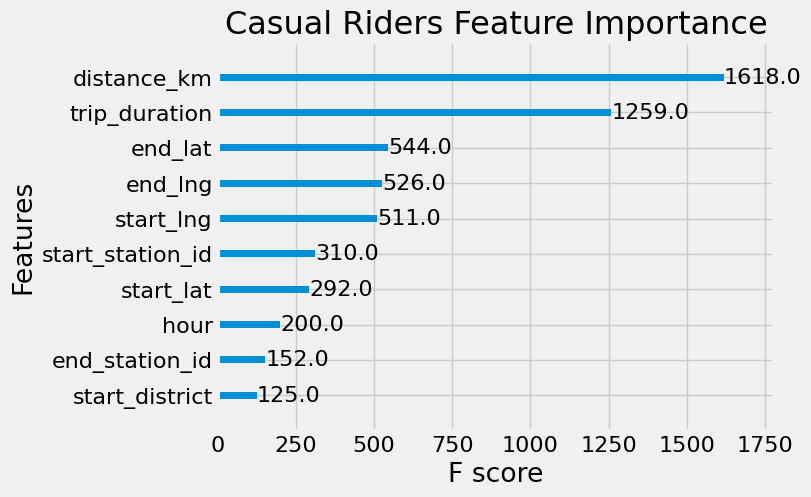

In [102]:
# Train the XGBoost model for casual riders
xgb_casual = xgb.XGBRegressor(**xgb_params)

# Fit the model and check for any issues
xgb_casual.fit(X_train, y_train_casual)

# Predict on the test set for casual riders
y_pred_casual = xgb_casual.predict(X_test)
rmse_casual = np.sqrt(mean_squared_error(y_test_casual, y_pred_casual))
print(f"Casual Riders RMSE: {rmse_casual}")

# After confirming the model is trained, plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_casual, importance_type='weight', max_num_features=10, title="Casual Riders Feature Importance")
plt.show()


Feature Importance for Members Riders

Member Riders RMSE: 0.40204283851764594


<Figure size 1000x600 with 0 Axes>

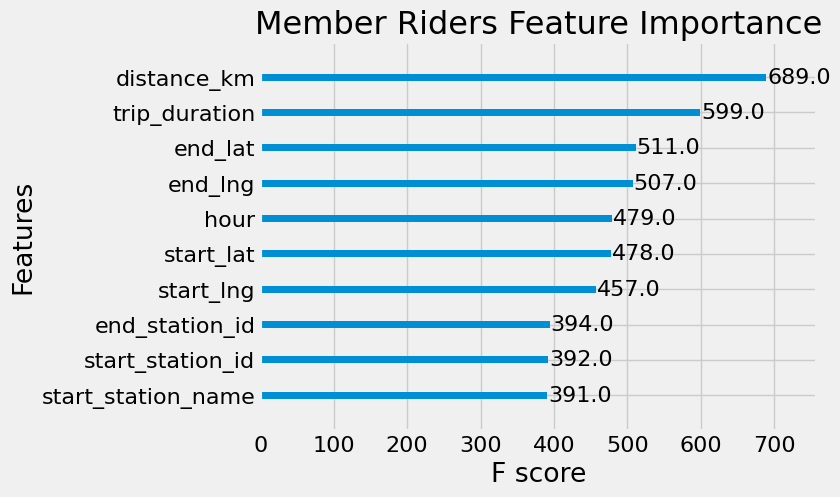

In [103]:
# Import necessary libraries
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Train the XGBoost model for member riders
xgb_member = xgb.XGBRegressor(**xgb_params)
xgb_member.fit(X_train_member, y_train_member)

# Predict on the test set for member riders
y_pred_member = xgb_member.predict(X_test_member)
rmse_member = np.sqrt(mean_squared_error(y_test_member, y_pred_member))
print(f"Member Riders RMSE: {rmse_member}")

# Plot feature importance for member riders
plt.figure(figsize=(10, 6))
plot_importance(xgb_member, importance_type='weight', max_num_features=10, title="Member Riders Feature Importance")
plt.show()
